# Tempo de empresa

In [2]:
import pandas as pd

df = pd.read_csv(r"C:\Users\rodol\Videos\Desktop\Projetos\Churn_funcionarios\Base_RH_csv2.csv", sep=';', encoding='latin-1')

# Criando um DataFrame
data = {'Grupos': df['Tempo_de_empresa']}
df = pd.DataFrame(data)

# Definindo os intervalos
bins = [0, 3, 5, 6, 9, 12, 15, 18, 22]
labels = ['0-2', '3-5', '6-8', '9-11', '12-14', '15-17', '18-20', '>21']

# Agrupando em intervalos
df['Grupos'] = pd.cut(df['Grupos'], bins=bins, labels=labels, right=False)

# Contando as frequências
frequencias_absolutas = df['Grupos'].value_counts().sort_index()

# Calculando a frequência relativa
total_elementos = len(df)
frequencias_relativas = (frequencias_absolutas / total_elementos) * 100

# Calculando a frequência acumulada
frequencias_acumuladas = frequencias_relativas.cumsum()

# Criando um DataFrame com resultados
resultados = pd.DataFrame({
    'Freq. Absoluta': frequencias_absolutas,
    'Freq. Relativa (%)': round(frequencias_relativas, 2),  # Arredondando para 2 casas decimais
    'Freq. Acumulada (%)': round(frequencias_acumuladas,2)
})

display(resultados)

,Freq. Absoluta,Freq. Relativa (%),Freq. Acumulada (%)
Grupos,,,
0-2,342,23.27,23.27
3-5,238,16.19,39.46
6-8,196,13.33,52.79
9-11,246,16.73,69.52
12-14,234,15.92,85.44
15-17,56,3.81,89.25
18-20,41,2.79,92.04
>21,65,4.42,96.46


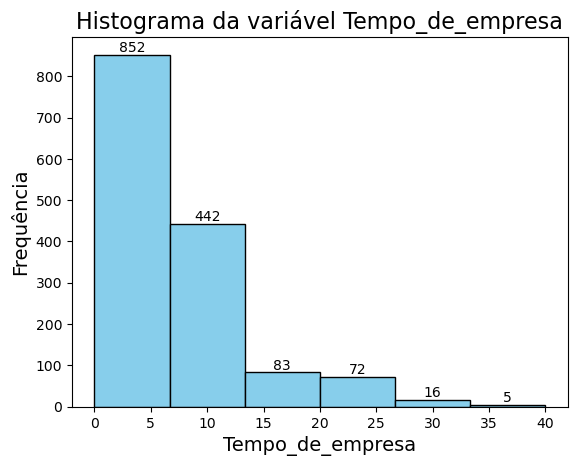

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv(r"C:\Users\rodol\Videos\Desktop\Projetos\Churn_funcionarios\Base_RH_csv2.csv", sep=';', encoding='latin-1')

def plot_histograma(dados, coluna, bins=6):
    # Criar o histograma e obter os dados das barras
    counts, bins, patches = plt.hist(dados[coluna], bins=bins, color='skyblue', edgecolor='black')

    # Adicionar título e rótulos
    plt.title(f'Histograma da variável {coluna}', fontsize=16)
    plt.xlabel(coluna, fontsize=14)
    plt.ylabel('Frequência', fontsize=14)

    # Adicionar rótulos de frequências acima de cada barra
    for count, bin_edge in zip(counts, bins):
        plt.text(bin_edge + (bins[1] - bins[0]) / 2, count, str(int(count)), ha='center', va='bottom')

    # Mostrar o gráfico
    plt.show()


plot_histograma(df, 'Tempo_de_empresa', bins=6)